In [1]:
import scanpy as sc
import anndata
import os
import fnmatch
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import importlib
import sys
from harmony import harmonize
import seaborn as sns
from matplotlib import rcParams
import math
from scipy import stats
import seaborn as sns
import scipy as sp
import h5py
import warnings
import random
import math
import scvelo as scv
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#Setting Scanpy figure parameters 
sc.settings.set_figure_params(dpi = 200, color_map = 'RdPu', dpi_save = 500)

In [4]:
adata_allcells = sc.read_h5ad("./adata_Final_for_Reinfection_publication.h5ad")
adata_allcells

AnnData object with n_obs × n_vars = 88360 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups

In [5]:
adata = sc.AnnData(adata_allcells.raw.X, obs=adata_allcells.obs, var=adata_allcells.raw.var, uns=adata_allcells.uns)
adata = adata[adata.obs['CoarseClustering'].isin(['T,NK cells']), :]
adata

View of AnnData object with n_obs × n_vars = 44669 × 26030
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'

In [6]:
adata.raw = adata.copy()
# keep blacklist genes from vars (they are stored in .raw so still accessible)
adata = adata[:,~adata.var['Blacklist_Genes']]
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata.var['highly_variable'].value_counts()
adata

AnnData object with n_obs × n_vars = 44669 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups

In [7]:
adata

AnnData object with n_obs × n_vars = 44669 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups

# 1. Regress out cell cycle genes

In [25]:
# list source: https://github.com/scverse/scanpy_usage/blob/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt
regev_lab_cell_cycle_genes_list = [
    "MCM5", "PCNA", "TYMS", "FEN1", "MCM2", "MCM4", "RRM1", "UNG", "GINS2", "MCM6",
    "CDCA7", "DTL", "PRIM1", "UHRF1", "MLF1IP", "HELLS", "RFC2", "RPA2", "NASP", "RAD51AP1",
    "GMNN", "WDR76", "SLBP", "CCNE2", "UBR7", "POLD3", "MSH2", "ATAD2", "RAD51", "RRM2",
    "CDC45", "CDC6", "EXO1", "TIPIN", "DSCC1", "BLM", "CASP8AP2", "USP1", "CLSPN", "POLA1",
    "CHAF1B", "BRIP1", "E2F8", "HMGB2", "CDK1", "NUSAP1", "UBE2C", "BIRC5", "TPX2", "TOP2A",
    "NDC80", "CKS2", "NUF2", "CKS1B", "MKI67", "TMPO", "CENPF", "TACC3", "FAM64A", "SMC4",
    "CCNB2", "CKAP2L", "CKAP2", "AURKB", "BUB1", "KIF11", "ANP32E", "TUBB4B", "GTSE1", "KIF20B",
    "HJURP", "CDCA3", "HN1", "CDC20", "TTK", "CDC25C", "KIF2C", "RANGAP1", "NCAPD2", "DLGAP5",
    "CDCA2", "CDCA8", "ECT2", "KIF23", "HMMR", "AURKA", "PSRC1", "ANLN", "LBR", "CKAP5",
    "CENPE", "CTCF", "NEK2", "G2E3", "GAS2L3", "CBX5", "CENPA"
]


In [26]:
s_genes = regev_lab_cell_cycle_genes_list[:43]
g2m_genes = regev_lab_cell_cycle_genes_list[43:]
cell_cycle_genes = [x for x in regev_lab_cell_cycle_genes_list if x in adata.var_names]
print(len(cell_cycle_genes))

96


In [27]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.regress_out(adata, ['S_score', 'G2M_score'])

In [ ]:
sc.tl.pca(adata, svd_solver = 'arpack', random_state = 18,use_highly_variable=True)
sc.pl.pca(adata, components=['1,2', '3,4'], color=['Group',"CD3D",'CD8A',"RORA","TBX21","GZMH"],
          ncols=4, use_raw=True)
sc.pl.pca_loadings(adata, components=[1,2,3,4])
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=12, random_state = 18)
sc.tl.umap(adata, min_dist = 0.1, spread = 2, random_state = 18)
# UMAP with cell cycle genes regressed out 
sc.pl.umap(adata, color = ["Group"])

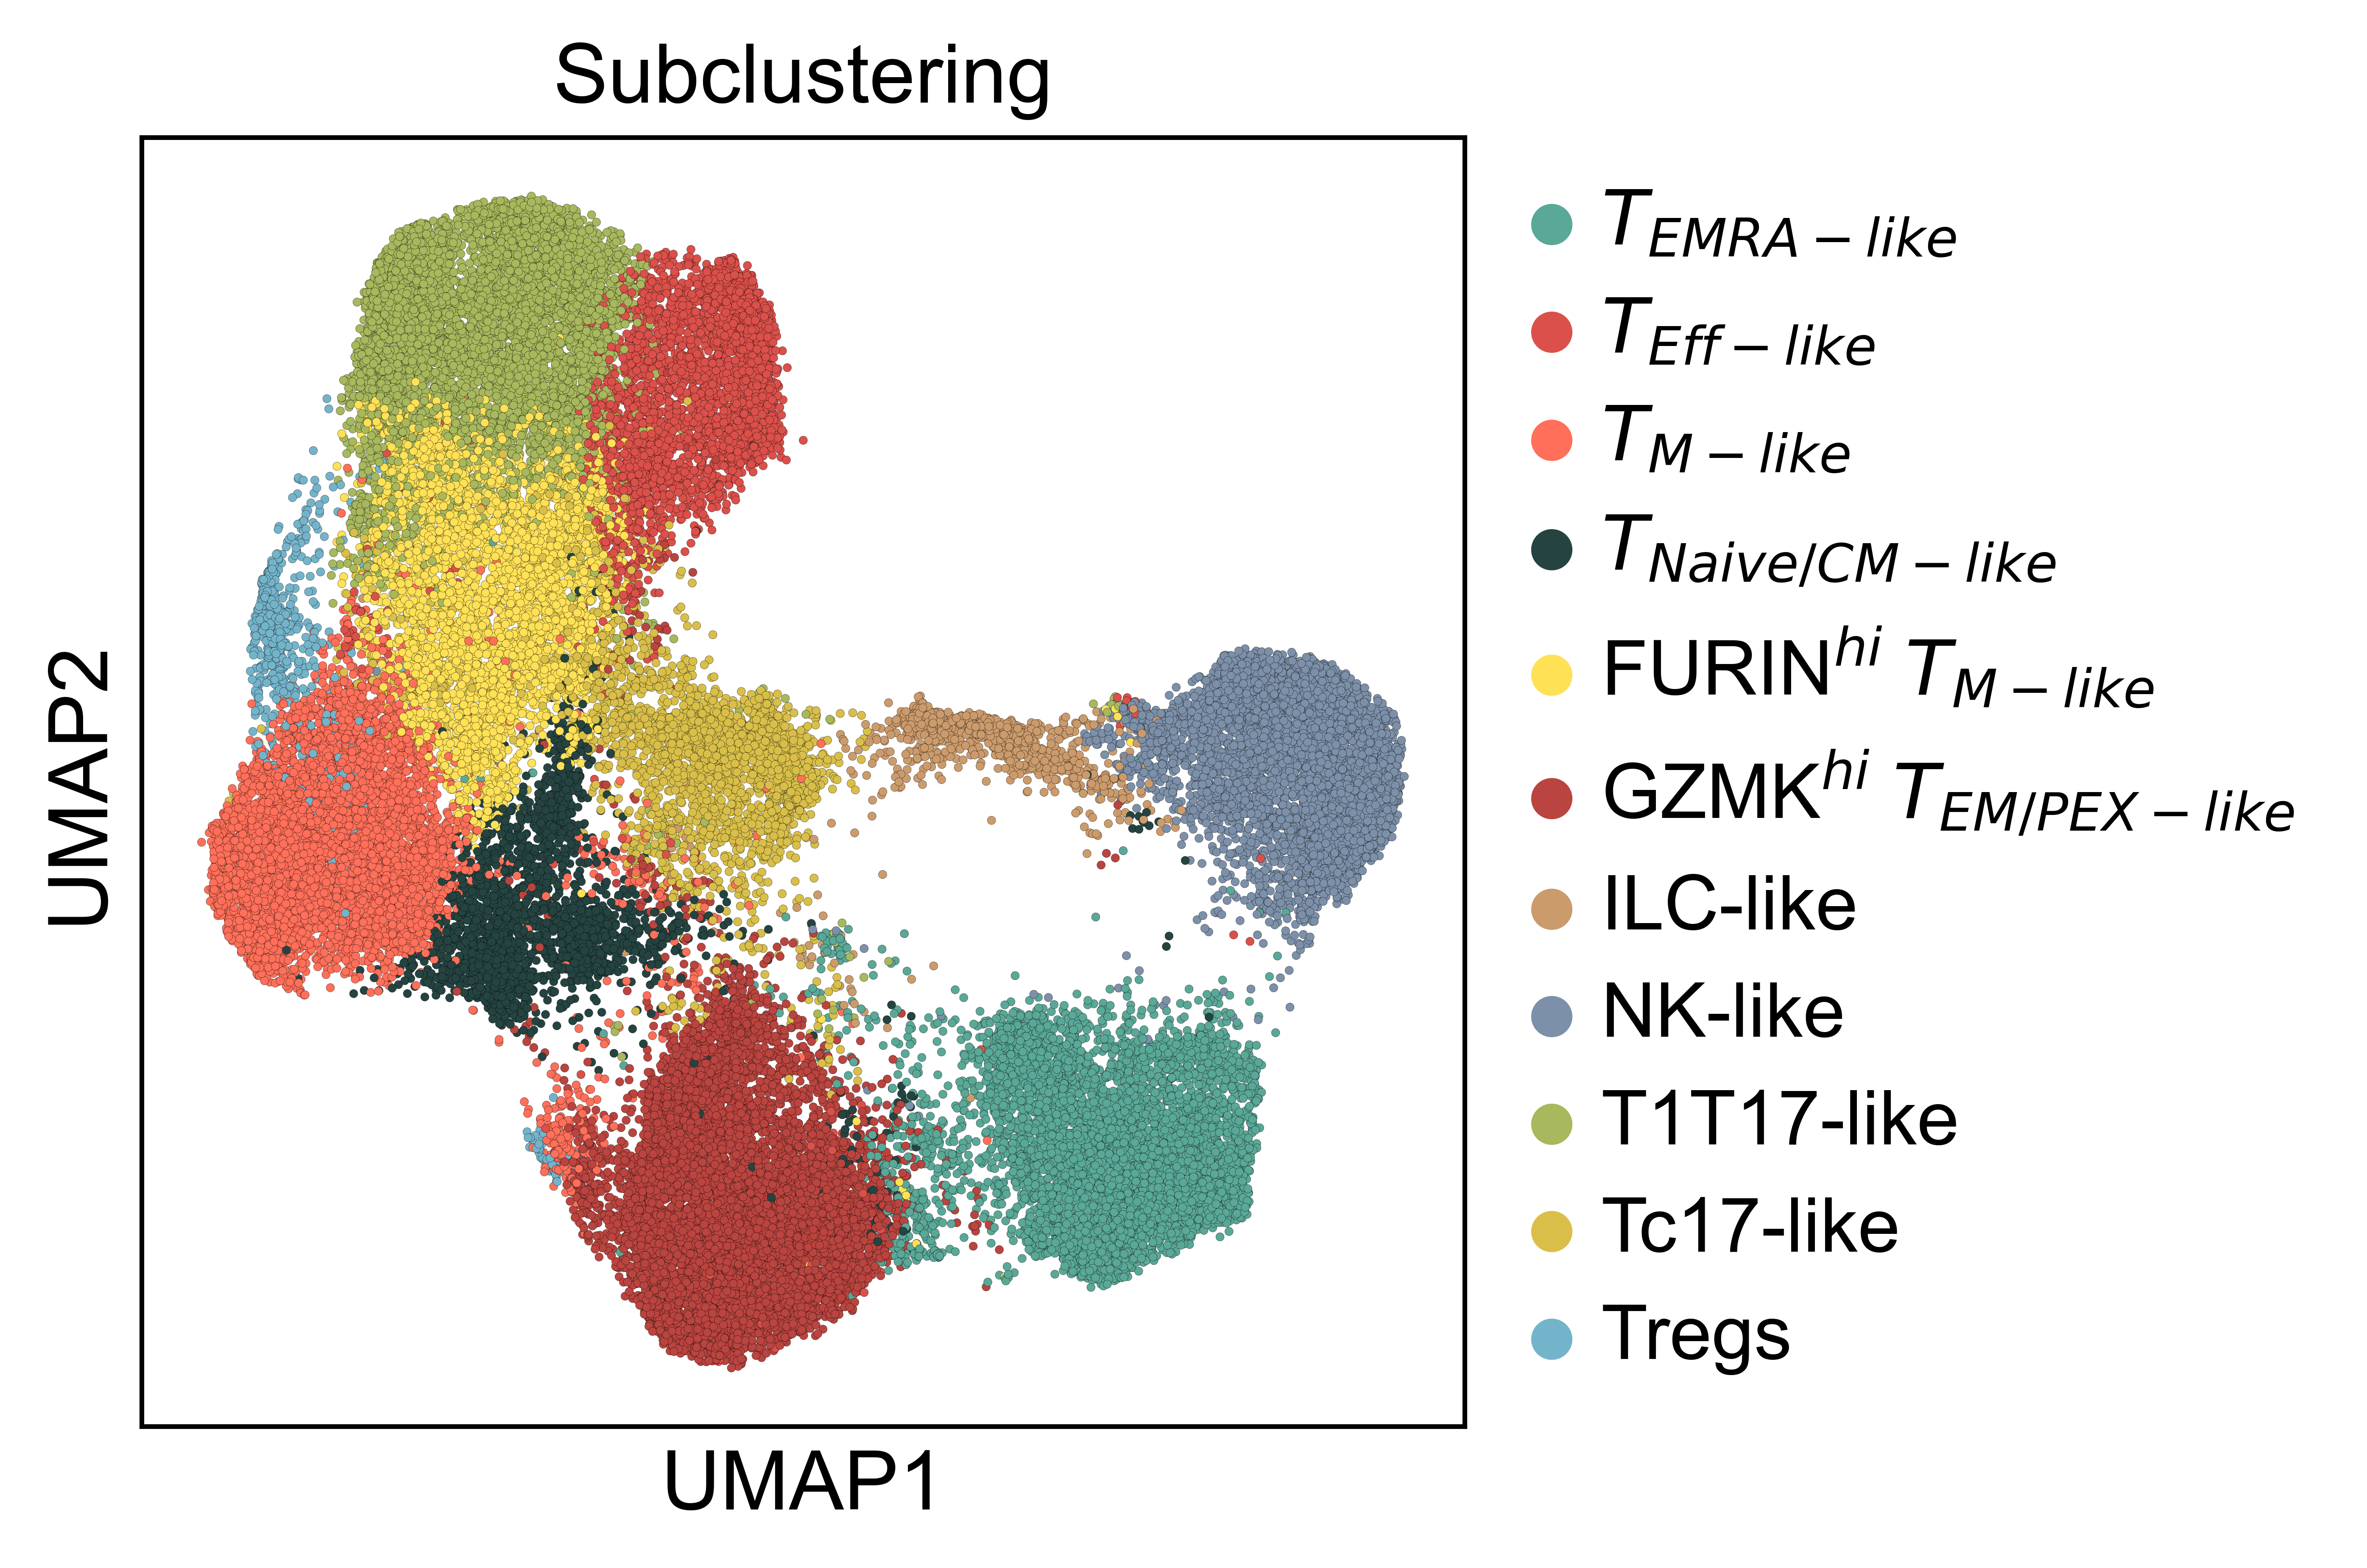

In [32]:
sc.pl.umap(adata, color=['Subclustering'],use_raw=True,edgecolor='k', linewidth=.035, size=8,save="Main_Figure_4A.png")

In [7]:
adata_NEW_2 = sc.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, uns=adata.uns)

sc.pp.normalize_per_cell(adata_NEW_2, counts_per_cell_after=1e4)

sc.pp.log1p(adata_NEW_2)

sc.pp.highly_variable_genes(adata_NEW_2, n_top_genes=2000)
print(adata_NEW_2.var['highly_variable'].value_counts())  
adata_scaled = sc.pp.scale(adata_NEW_2, copy=True)  

adata_NEW_2.layers['scaled'] = adata_scaled.X  

highly_variable
False    24030
True      2000
Name: count, dtype: int64


In [9]:
from matplotlib import colors
joses_cmap=sns.color_palette(["#A020F0", "#9C1FEB", "#991EE6", "#961EE1", "#931DDC", "#8F1CD7", "#8C1CD2", "#891BCE", "#861AC9", "#821AC4", "#7F19BF", "#7C18BA", "#7918B5", "#7517B0", "#7216AC",
  "#6F16A7", "#6C15A2", "#69159D", "#651498", "#621393", "#5F138F", "#5C128A", "#581185", "#551180", "#52107B", "#4F0F76", "#4B0F71", "#480E6D", "#450D68", "#420D63",
  "#3F0C5E", "#3B0B59", "#380B54", "#350A4F", "#320A4B", "#2E0946", "#2B0841", "#28083C", "#250737", "#210632", "#1E062E", "#1B0529", "#180424", "#15041F", "#11031A",
  "#0E0215", "#0B0210", "#08010C", "#040007", "#010002", "#020200", "#070700", "#0C0C00", "#121200", "#171700", "#1C1C00", "#212100", "#262600", "#2B2B00", "#303000",
  "#363600", "#3B3B00", "#404000", "#454500", "#4A4A00", "#4F4F00", "#555500", "#5A5A00", "#5F5F00", "#646400", "#696900", "#6E6E00", "#737300", "#797900", "#7E7E00",
  "#838300", "#888800", "#8D8D00", "#929200", "#979700", "#9D9D00", "#A2A200", "#A7A700", "#ACAC00", "#B1B100", "#B6B600", "#BCBC00", "#C1C100", "#C6C600", "#CBCB00",
  "#D0D000", "#D5D500", "#DADA00", "#E0E000", "#E5E500", "#EAEA00", "#EFEF00", "#F4F400", "#F9F900", "#FFFF00"])
shalek_colors = colors.ListedColormap(joses_cmap.as_hex())

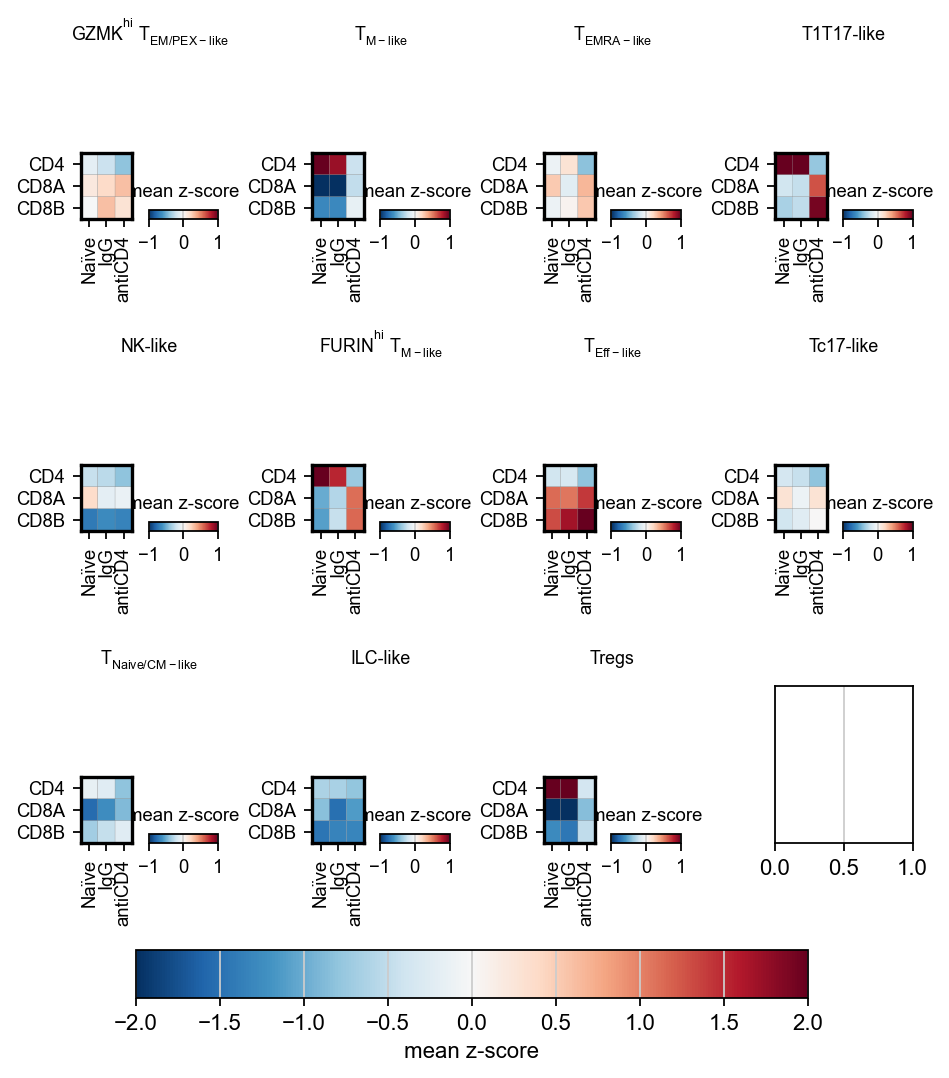

In [8]:
import matplotlib.pyplot as plt
import scanpy as sc
import matplotlib as mpl

sc.set_figure_params(scanpy=True, fontsize=10)
params = {'mathtext.default': 'regular'}          
plt.rcParams.update(params)

tcell_subsets_ordered = [
    'GZMK$^{hi}$ $T_{EM/PEX-like}$',
    '$T_{M-like}$',
    '$T_{EMRA-like}$',
    'T1T17-like',
    'NK-like',
    'FURIN$^{hi}$ $T_{M-like}$',
    '$T_{Eff-like}$',
    'Tc17-like',
    '$T_{Naive/CM-like}$',
    'ILC-like',
    'Tregs'
]

tcell_marker_Genes = ["CD4", "CD8A", "CD8B"]

num_rows = 3  
num_cols = (len(tcell_subsets_ordered) + 2) // num_rows  
subplot_width = 1.5 
subplot_height = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(subplot_width * num_cols, subplot_height * num_rows), sharey=True)
axs = axs.flatten()

matrix_plots = []

for i, cell_subset in enumerate(tcell_subsets_ordered):
    subset_data = adata_NEW_2[(adata_NEW_2.obs['Group'].isin(["IgG", "antiCD4", "Naïve"])) & 
                               (adata_NEW_2.obs['Subclustering'] == cell_subset), :]
    
    matrix_plot = sc.pl.matrixplot(subset_data, 
                     var_names=tcell_marker_Genes,
                     groupby="Group", 
                     dendrogram=False,
                     categories_order=["Naïve", "IgG", "antiCD4"],
                     colorbar_title='mean z-score', 
                     layer='scaled', 
                     vmin=-1, 
                     vmax=1, 
                     cmap="RdBu_r",
                     use_raw=True,
                     swap_axes=True,
                     ax=axs[i],  
                     show=False)
    
    # annotate t cell subset for each subplot
    axs[i].set_title(cell_subset, fontsize=8, pad=10)
    
    matrix_plots.append(matrix_plot)

for ax in axs:
    for coll in ax.collections:
        ax.collections.remove(coll)

if matrix_plots:
    cmap = "RdBu_r"  
    norm = mpl.colors.Normalize(vmin=-2, vmax=2)  
    cbar_ax = fig.add_axes([0.15, -0.05, 0.7, 0.05])  
    colorbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal')
    colorbar.set_label('mean z-score')

plt.tight_layout()
#plt.savefig('T_cell_CD4_CD8_heatmaps_combined.png', dpi=100, transparent=True, bbox_inches='tight')
plt.show()

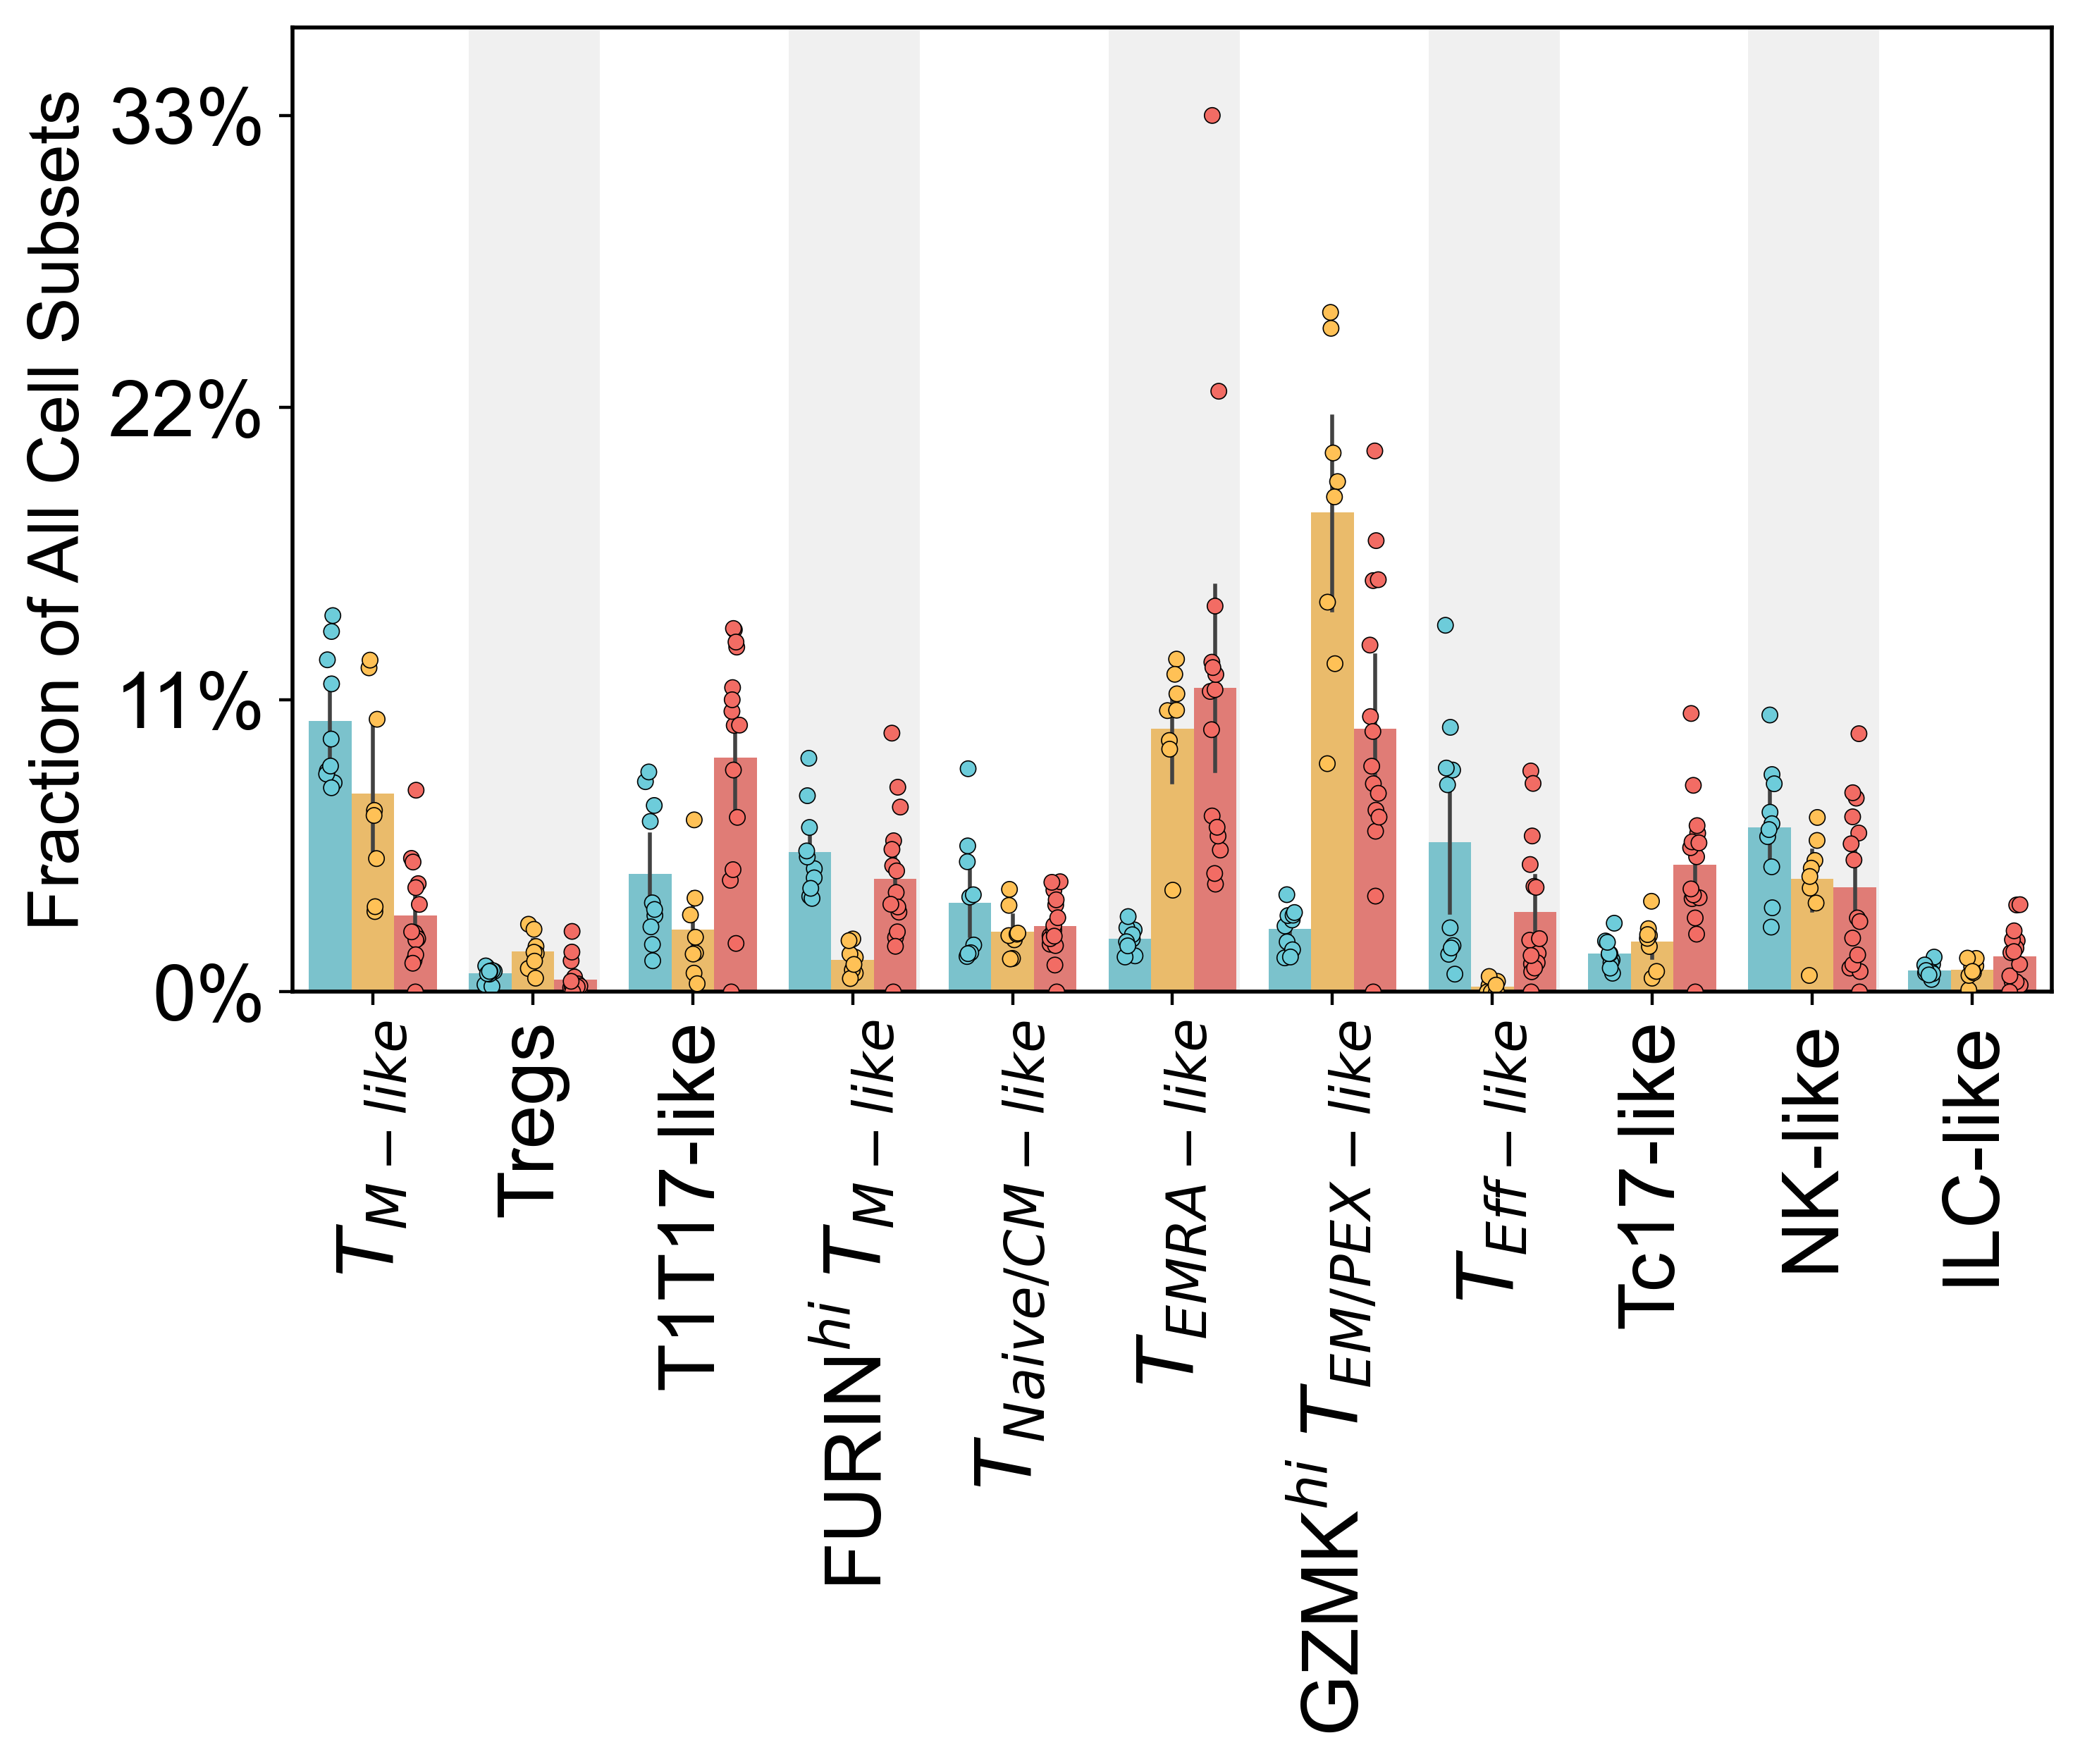

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import scanpy as sc


cell_types = list(set(adata_allcells.obs.SubclusteringV2))
cell_types_column = 'SubclusteringV2'
sample_column = 'array number'
group_column = 'Group'

adata_df = adata_allcells.obs[[cell_types_column, sample_column, group_column]]
adata_df['count'] = 1

pivot_df_all = adata_df.groupby([cell_types_column, sample_column, group_column]).count().reset_index()
pivot_df_all = pivot_df_all.pivot_table(index=[sample_column, group_column], columns=cell_types_column, values='count', fill_value=0)
pivot_df_all.columns = pivot_df_all.columns.get_level_values(0)
pivot_df_all = pivot_df_all.apply(pd.to_numeric, errors='ignore')

fraction_df = pivot_df_all.div(pivot_df_all[cell_types].sum(axis=1), axis=0)
fraction_df[sample_column] = pivot_df_all.index.get_level_values(sample_column)
fraction_df[group_column] = pivot_df_all.index.get_level_values(group_column)

# Define T cell subsets
t_cell_subsets = [
    '$T_{M-like}$',
    'Tregs',
    'T1T17-like',
    'FURIN$^{hi}$ $T_{M-like}$',
    '$T_{Naive/CM-like}$',
    '$T_{EMRA-like}$',
    'GZMK$^{hi}$ $T_{EM/PEX-like}$',
    '$T_{Eff-like}$',
    'Tc17-like',
    'NK-like',
    'ILC-like',
]

# Create dataframe for cell types
fraction_df_t_cells = fraction_df[t_cell_subsets + [sample_column, group_column]]
df_t_cells = pd.melt(fraction_df_t_cells, id_vars=[sample_column, group_column], value_vars=t_cell_subsets, var_name='cell', value_name='prop')

# Define pairs for statistical comparison
unique_groups_per_cell = {
    cell_type: df_t_cells[df_t_cells['cell'] == cell_type]['Group'].cat.categories.tolist()
    for cell_type in t_cell_subsets
}

pairs_t_cells = []
for cell_type in t_cell_subsets:
    groups = unique_groups_per_cell[cell_type]
    if 'Naïve' in groups and 'IgG' in groups:
        pairs_t_cells.append([(cell_type, 'Naïve'), (cell_type, 'IgG')])
    if 'antiCD4' in groups and 'IgG' in groups:
        pairs_t_cells.append([(cell_type, 'antiCD4'), (cell_type, 'IgG')])

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.

fig, ax = plt.subplots(figsize=(8, 4.5))
hue_order_Gran = ['Naïve', 'IgG', 'antiCD4']

fg = sns.barplot(x='cell', y='prop', hue=df_t_cells["Group"], data=df_t_cells, palette=reinfection_palette, hue_order=hue_order_Gran, errwidth=1)
fg = sns.stripplot(x='cell', y='prop', hue=df_t_cells["Group"], data=df_t_cells, hue_order=hue_order_Gran,
            edgecolor='k',
            size=4,
            dodge=True,
            linewidth=.3,
            palette=reinfection_palette,
            ax=fg,
            )

y_max = df_t_cells['prop'].max()

ax.set_ylim(0, y_max * 1.1) 

num_ticks = 4
y_ticks = np.linspace(0, y_max, num_ticks)
ax.set_yticks(y_ticks)

ax.set_yticklabels([f"{x:.0%}" for x in y_ticks])

for pi in range(1, len(t_cell_subsets), 2):
    ax.add_patch(patches.Rectangle((pi * 1 - 0.4, -.2), .82, 1.2, facecolor="#f0f0f0", edgecolor='none', zorder=-20))

plt.xticks(rotation=90, fontsize=20)
plt.grid(False)
plt.xlabel(None)
plt.ylabel('Fraction of All Cell Subsets', fontsize=18)
plt.yticks(fontsize=20)
plt.legend().remove()
fg.set_title("", fontsize=20)

# Calculate p-values and add annotations
y_offset = 0.02 
x_offset_naive_igg = -0.13 
x_offset_antecd4_igg = 0.13  

p_value_y_position_naive_igg = y_max * 1.05
p_value_y_position_antecd4_igg = y_max * 1.08

for idx, pair in enumerate(pairs_t_cells):
    data1 = df_t_cells[(df_t_cells['cell'] == pair[0][0]) & (df_t_cells['Group'] == pair[0][1])]['prop'].dropna()
    data2 = df_t_cells[(df_t_cells['cell'] == pair[1][0]) & (df_t_cells['Group'] == pair[1][1])]['prop'].dropna()
    _, p_val = mannwhitneyu(data1, data2)

    if pd.isna(p_val):
        continue

    x1 = t_cell_subsets.index(pair[0][0])
    x2 = t_cell_subsets.index(pair[1][0])

    if pair[0][1] == 'Naïve' and pair[1][1] == 'IgG':
        x_position = x1 + (x2 - x1) / 2 + x_offset_naive_igg
        y_position = p_value_y_position_naive_igg
    elif pair[0][1] == 'antiCD4' and pair[1][1] == 'IgG':
        x_position = x1 + (x2 - x1) / 2 + x_offset_antecd4_igg
        y_position = p_value_y_position_antecd4_igg
    else:
        x_position = x1 + (x2 - x1) / 2
        y_position = p_value_y_position_naive_igg 

    if p_val < 0.05:
        p_value_text = f"p={p_val:.4f}"
    else:
        p_value_text = "ns"

    #  to add p-value annotations
    # ax.annotate(p_value_text, xy=(x_position, y_position), ha='center', fontsize=7)

plt.savefig('Figure4_TNKcell_Fraction.png', bbox_inches="tight", dpi=1000, transparent=True)
plt.show()